# Session 7, Logistic Regression

In [14]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Practice - solution
### Interpreting logit coeffients and statistics
Example - learning the probability of school admission based on two exams

In [4]:
admission = pd.read_csv('data/admission.csv')  
admission.head()

,exam1,exam2,admit
0,34,78,0
1,30,43,0
2,35,72,0
3,60,86,1
4,79,75,1


In [5]:
# split sample into training and test ones
np.random.seed(100)
Index = np.random.binomial(1, 0.6, size = len(admission))
train, test = admission[Index==1], admission[Index==0]

In [6]:
# Q1. Perform the similar analysis, run the logistic regression on the training set
# Q2. Predict admittance on you test set, compare with the actual labels
# Q3. Calculate the confusion matrix, how well is our model performing?
# Q4. Predict the probability of acceptance for a student with exam scores 75 and 53.

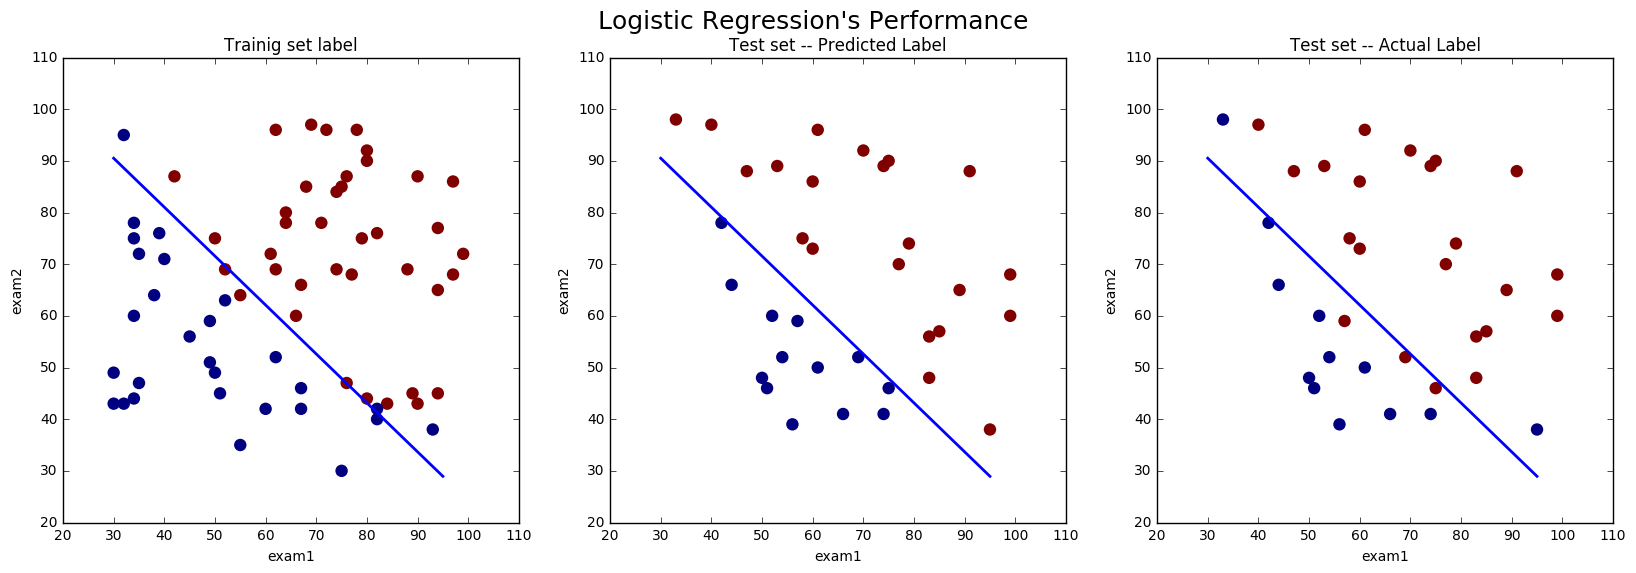

Precision = 90.48%
Accuracy = 85.29%
Recall = 86.36%


In [12]:
lr = LogisticRegression(C=1e6)
lr.fit(train[['exam1','exam2']], train['admit'])
pre = lr.predict(test[['exam1','exam2']])

fig3 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance", fontsize = 18)
ax1, ax2, ax3 = fig3.add_subplot(131), fig3.add_subplot(132), fig3.add_subplot(133)
xplot = np.linspace(30,95,200)
yplot = -(lr.intercept_[0] + lr.coef_[0][0]*xplot)/lr.coef_[0][1]
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)
ax3.plot(xplot,yplot,lw = 2)
ax1.set(title='Trainig set label', xlabel = 'exam1', ylabel = 'exam2')
ax2.set(title='Test set -- Predicted Label', xlabel = 'exam1', ylabel = 'exam2')
ax3.set(title='Test set -- Actual Label', xlabel = 'exam1', ylabel = 'exam2')
ax1.scatter(train.exam1, train.exam2, lw = 0, s = 80, c = train.admit)
ax2.scatter(test.exam1, test.exam2, lw = 0, s = 80, c = pre)
ax3.scatter(test.exam1, test.exam2, lw = 0, s = 80, c = test.admit)
plt.show()

#compute TP,FP,FN,TN for the above classification
TP = sum((pre==1)&(test.admit==1))
FP = sum((pre==1)&(test.admit==0))
FN = sum((pre==0)&(test.admit==1))
TN = sum((pre==0)&(test.admit==0))
#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

In [13]:
# Predict the probability of acceptance for a student with exam scores 75 and 53.
lr.predict_proba(np.array([75,53]).reshape(1,-1))[0][1]

0.80102665320112199